# Goal

Can a classification model determine if a wine is white or red?

Which classification model, if any, works best to classify this data based on these variables?

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading the csv, which already has an index column
df = pd.read_csv("wine-data/winemag-data-130k-v2.csv", index_col=0)

Data in the description and designation columns are going to give away what kind of wine it is in many cases. We also are not interested in details about the taster of the wine. Thus, we'll remove those columns, as well as the title for each wine, and leave only columns that we hope will work as potential predicters of variety.

In [3]:
data = df.drop(columns=["description", "designation",
                        "taster_name", "taster_twitter_handle", "title"])

### Exploring the Data

In [4]:
data.head()

,country,points,price,province,region_1,region_2,variety,winery
0,Italy,87,NaN,Sicily & Sardinia,Etna,NaN,White Blend,Nicosia
1,Portugal,87,15.0,Douro,NaN,NaN,Portuguese Red,Quinta dos Avidagos
2,US,87,14.0,Oregon,Willamette Valley,Willamette Valley,Pinot Gris,Rainstorm
3,US,87,13.0,Michigan,Lake Michigan Shore,NaN,Riesling,St. Julian
4,US,87,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Sweet Cheeks


In [5]:
data.shape

(129971, 8)

In [6]:
# Checking for nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 8 columns):
country     129908 non-null object
points      129971 non-null int64
price       120975 non-null float64
province    129908 non-null object
region_1    108724 non-null object
region_2    50511 non-null object
variety     129970 non-null object
winery      129971 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 8.9+ MB


In [7]:
varieties = set(data["variety"])

In [8]:
len(varieties)

708

In [9]:
# Since the top 30 varieties account for more than 80% of our data,
# let's only use observations where the variety is one of those,
# to make it easier to create our target variable, red/white
top_30_variety_counts = data["variety"].value_counts()[:30]
top_30_variety_counts.sum()

105154

In [10]:
top_30_varieties = list(top_30_variety_counts.index)
print(top_30_varieties)

['Pinot Noir', 'Chardonnay', 'Cabernet Sauvignon', 'Red Blend', 'Bordeaux-style Red Blend', 'Riesling', 'Sauvignon Blanc', 'Syrah', 'Rosé', 'Merlot', 'Nebbiolo', 'Zinfandel', 'Sangiovese', 'Malbec', 'Portuguese Red', 'White Blend', 'Sparkling Blend', 'Tempranillo', 'Rhône-style Red Blend', 'Pinot Gris', 'Champagne Blend', 'Cabernet Franc', 'Grüner Veltliner', 'Portuguese White', 'Bordeaux-style White Blend', 'Pinot Grigio', 'Gamay', 'Gewürztraminer', 'Viognier', 'Shiraz']


In [11]:
# Now, let's make our data just those where the variety is one of the top 30
data = data[data["variety"].isin(top_30_varieties)]

In [12]:
data.head()

,country,points,price,province,region_1,region_2,variety,winery
0,Italy,87,NaN,Sicily & Sardinia,Etna,NaN,White Blend,Nicosia
1,Portugal,87,15.0,Douro,NaN,NaN,Portuguese Red,Quinta dos Avidagos
2,US,87,14.0,Oregon,Willamette Valley,Willamette Valley,Pinot Gris,Rainstorm
3,US,87,13.0,Michigan,Lake Michigan Shore,NaN,Riesling,St. Julian
4,US,87,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Sweet Cheeks


In [13]:
# I made the color dictionary by hand for this, to make it easier to see
# which wines are in which category here
# For the curious, I'm considering a Rose a white for simplicity
color = {"red": ["Pinot Noir", "Cabernet Sauvignon", "Red Blend",
                 "Bordeaux-style Red Blend", "Syrah", "Merlot", "Nebbiolo",
                 "Zinfandel", "Sangiovese", "Malbec", "Portuguese Red",
                 "Tempranillo", "Rhône-style Red Blend", "Cabernet Franc",
                 "Gamay", "Shiraz"],
         "white": ["Chardonnay", "Riesling", "Sauvignon Blanc", "Rosé",
                   "White Blend", "Sparkling Blend", "Pinot Gris",
                   "Champagne Blend", "Grüner Veltliner", "Portuguese White",
                   "Bordeaux-style White Blend", "Pinot Grigio",
                   "Gewürztraminer", "Viognier"]}

In [14]:
color["red"]

['Pinot Noir',
 'Cabernet Sauvignon',
 'Red Blend',
 'Bordeaux-style Red Blend',
 'Syrah',
 'Merlot',
 'Nebbiolo',
 'Zinfandel',
 'Sangiovese',
 'Malbec',
 'Portuguese Red',
 'Tempranillo',
 'Rhône-style Red Blend',
 'Cabernet Franc',
 'Gamay',
 'Shiraz']

In [15]:
# Creating our new target column, color
def find_color(variety):
    if variety in color["red"]:
        var_color = "red"
    elif variety in color["white"]:
        var_color = "white"
    else:
        var_color = "whoops"
    return var_color
data["color"] = df["variety"].map(lambda x: find_color(x))

In [17]:
# Dropping our variety column, since we no longer need it
data = data.drop(columns="variety")

In [22]:
data.head()

,country,points,price,province,region_1,region_2,winery,color
0,Italy,87,NaN,Sicily & Sardinia,Etna,NaN,Nicosia,white
1,Portugal,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos,red
2,US,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm,white
3,US,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian,white
4,US,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks,red


In [21]:
# Our classes are unbalanced, something we should keep in mind later
data["color"].value_counts()

red      65687
white    39467
Name: color, dtype: int64

In [25]:
# Let's go ahead and remove our target variable
target = data["color"]
data = data.drop(columns="color")

In [27]:
# for column in data.columns:
#     print(data[column].value_counts())

In [35]:
pd.get_dummies(data["country"])

,Argentina,Armenia,Australia,Austria,Brazil,Bulgaria,Canada,Chile,Croatia,Cyprus,...,Serbia,Slovakia,Slovenia,South Africa,Spain,Switzerland,Turkey,US,Ukraine,Uruguay
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


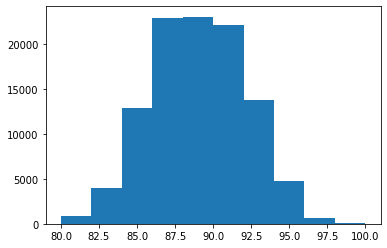

In [32]:
plt.hist(data["points"])
plt.show()

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


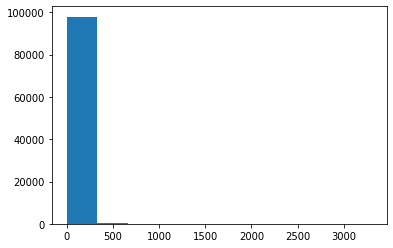

In [33]:
plt.hist(data["price"])
plt.show()

## Naive Bayes Classifier

## Logistic Regression

## Decision Tree